In [2]:
import pandas as pd
import numpy as np
from loss_functions import *
from LinearRegression import Linear_Regression

## Data

### Reading the data

In [3]:
df = pd.read_csv('data/Real estate.csv')
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Preparing the data

In [4]:
del df['No']
df.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df['X2 house age']

0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: X2 house age, Length: 414, dtype: float64

In [6]:
conditions = [df['X2 house age'] <= 7.5, (df['X2 house age'] > 7.5) & (df['X2 house age'] <= 15), (df['X2 house age'] >
              15) & (df['X2 house age'] <= 22.5), (df['X2 house age'] > 22.5) & (df['X2 house age'] <= 30), (df['X2 house age'] > 30)]
choices = [0, 1, 2, 3, 4]
df['X2 house age'] = np.select(conditions, choices, default=None)
df.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,4,84.87882,10,24.98298,121.54024,37.9
1,2012.917,2,306.59470,9,24.98034,121.53951,42.2
2,2013.583,1,561.98450,5,24.98746,121.54391,47.3
3,2013.500,1,561.98450,5,24.98746,121.54391,54.8
4,2012.833,0,390.56840,5,24.97937,121.54245,43.1


In [7]:
# df['X1 transaction date'] = df['X1 transaction date'].round()
# df.head()

In [8]:
df['X5 latitude'] = df['X5 latitude'] - df['X5 latitude'].mean()
df['X6 longitude'] = df['X6 longitude'] - df['X6 longitude'].mean()
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,4,84.87882,10,0.01395,0.006879,37.9
1,2012.917,2,306.59470,9,0.01131,0.006149,42.2
2,2013.583,1,561.98450,5,0.01843,0.010549,47.3
3,2013.500,1,561.98450,5,0.01843,0.010549,54.8
4,2012.833,0,390.56840,5,0.01034,0.009089,43.1


## Loss function

### Testing the Loss function

In [9]:
X = df.iloc[:,:-1]
y = df['Y house price of unit area'].to_numpy()
X.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,4,84.87882,10,0.01395,0.006879
1,2012.917,2,306.59470,9,0.01131,0.006149
2,2013.583,1,561.98450,5,0.01843,0.010549
3,2013.500,1,561.98450,5,0.01843,0.010549
4,2012.833,0,390.56840,5,0.01034,0.009089


In [10]:
X['X1 transaction date'] = X['X1 transaction date'].round()
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2013.0,4,84.87882,10,0.01395,0.006879
1,2013.0,2,306.59470,9,0.01131,0.006149
2,2014.0,1,561.98450,5,0.01843,0.010549
3,2014.0,1,561.98450,5,0.01843,0.010549
4,2013.0,0,390.56840,5,0.01034,0.009089


In [11]:
# df["X3 distance to the nearest MRT station"] = np.log(df["X3 distance to the nearest MRT station"])
# df.head()

In [12]:
coefs = [1,1,1,1,1,1]
constant = 0

In [13]:
loss = mean_squared_error(y, X, coefs=coefs, constant=constant)
print(f'loss: {loss}')

loss: 11002425.206856698


### Testing it

In [14]:
model = Linear_Regression(y,X,learning_rate=0.00000001,learning_limiter= 50)
model.train()
model.rsme()

10.042693293042118

In [15]:
model.coefs

[0.02275854436983186,
 -2.425709279403719e-06,
 -0.007239622416761445,
 0.00010529665390989283,
 2.4391839031957617e-07,
 1.5627015536211586e-07]

In [16]:
model.intercept

1.0544083272233551e-05

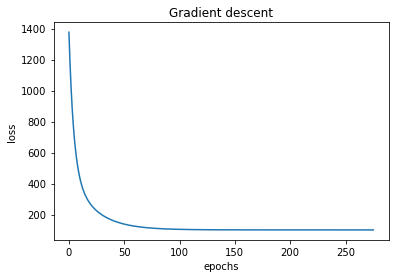

In [17]:
model.plot_gradient_descent()

In [18]:
model.predict(X.iloc[5].to_numpy())

30.06688030067553

In [19]:
df.iloc[5]['Y house price of unit area']

32.1